In this notebook we study [renewal processes](https://en.wikipedia.org/wiki/Renewal_theory#Example_applications). Let's think about the following problem. Suppose there's a machine in a factory with a maximum lifetime $t_l$, but which can, with uniform probability, break spontaneously before that. If a machine is broken, it costs $C_s$ to fix. However, if the machine is still functional, it is possible to due cheaper maintenance work which cost $C_i$. This maintenance work "resets" the clock. We want to figure out the optimal strategy, i.e. how long should one wait before initiating a maintenance treatment $t_w$ to minimise expanses.

Load library and set up environment

In [1]:
import sympy
sympy.init_printing()

Let us consider a very long time during which the machine ran $T_e \gg T_l$. We denote by $N_i$ the number of times the machine underwent treatment, and by $N_s$ the number of times it broke and had to be fixed. In cases when the machine does break spontaneously, it lasts, on average, for a period of $\frac{1}{2} T_w$, hence

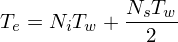

In [2]:
T_e = sympy.Symbol('T_e')
N_i = sympy.Symbol('N_i')
T_w = sympy.Symbol('T_w')
N_s = sympy.Symbol('N_s')
total_duration_equation = sympy.Eq(T_e, N_i*T_w+N_s*T_w/2)
total_duration_equation

The probability that a machine breaks spontaneously is $T_w/T_l$, and so

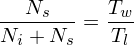

In [3]:
T_l = sympy.Symbol('T_l')
failure_rate_relation = sympy.Eq(N_s/(N_i+N_s), T_w/T_l)
failure_rate_relation

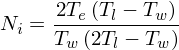

In [4]:
temp = total_duration_equation
temp = temp.subs(sympy.solve(failure_rate_relation, N_s, dict=True)[0])
N_i_expr = sympy.solve(temp, N_i)[0]
sympy.Eq(N_i, N_i_expr)

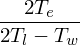

In [5]:
temp = failure_rate_relation
temp = temp.subs(N_i, N_i_expr)
N_s_expr = sympy.solve(temp, N_s)[0]
N_s_expr

In [6]:
C_i = sympy.Symbol('C_i')
C_s = sympy.Symbol('C_s')
cost = C_i*N_i+C_s*N_s
cost

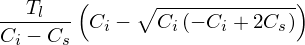

In [7]:
temp = cost
temp = temp.subs(N_i, N_i_expr)
temp = temp.subs(N_s, N_s_expr)
temp = sympy.solve(temp.diff(T_w).simplify(), T_w)[0]
optimal_T_w = temp
optimal_T_w

and the corresponding price is

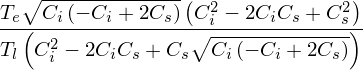

In [12]:
temp = cost
temp = temp.subs(N_i, N_i_expr)
temp = temp.subs(N_s, N_s_expr)
temp = temp.subs(T_w, optimal_T_w)
optimal_price = temp.simplify()
optimal_price

In the limit $C_s \gg C_i$, the optimal $T_w$ reduces to

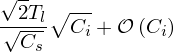

In [8]:
optimal_T_w.series(C_i,0,1)

and the optimal price reduces to

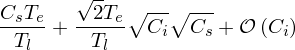

In [14]:
optimal_price.series(C_i,0,1)

Compared with the price of total neglect

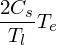

In [15]:
2*C_s*T_e/T_l

Let's try to understand this result more intuitively. The total cost of maintenance scales as $T_w^{-1}$. The total cost of repair, to first order, does not depend on $T_w$. This is because the probability that a machine will break down during $T_w$ scales as $T_w$, but the number of opportunities to break down increases as $T_w^{-1}$ so the total number of times the machine breaks down does not change. For this reason, when it comes to the cost due to breakdown, we have to consider second order effects. These second order effects introduce a correction to the total repair cost which scales as $T_w/T_l$.

Another interesting insight is that if the machines break down according to the Poisson statistics, then it makes no sense to due maintenance work.